EE 399 Homework 1 - Zack Martin
Github Page: https://github.com/zimartin
Repo: https://github.com/zimartin/EE-399-HW-1

In [68]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P
from numpy.polynomial.polynomial import polyval

2.i

In [69]:
# define data
x = np.arange(0, 31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

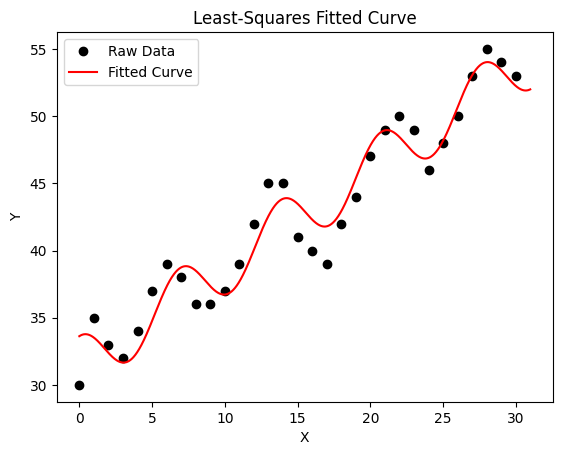

A = 2.171726965658166
B = 0.9093254571756474
C = 0.7324879682604329
D = 31.452780916275167
Minimum Error: 1.5927258502884714


In [70]:
# find minimum error and params of A,B,C,D

# define the model: Acos(Bx) + Cx + D
# returns least squared error
def fit_err(c, x, y):
    model = c[0]*np.cos(c[1]*x)+c[2]*x + c[3]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

# initial guesses for params of function
v0 = np.array([3, 1*np.pi/4, 2/3, 32])

# perform optimization
res = opt.minimize(fit_err, v0, args=(x, y))

# store optimized params
c = res.x

# generate data for the plot
x2 = np.arange(0, 31, 0.01)
y2 = (c[0] * np.cos(c[1] * x2) + c[2] * x2 + c[3])

# plots
plt.figure(1)
plt.plot(x, y, 'ko', label='Raw Data')
plt.plot(x2, y2, 'r-', label='Fitted Curve')
plt.title("least-squared Fitted Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print('A = ' + str(c[0]))
print('B = ' + str(c[1]))
print('C = ' + str(c[2]))
print('D = ' + str(c[3]))
print("Minimum Error:", fit_err(c, x, y))

2.ii

In [71]:
# constant, allows length of original data to change
L = len(x)

# find the error with 2 values locked, sweep the other 2
def find_err(param, sweep):
  a, b, c, d = param

  # store param values
  cfix = np.zeros((4, L))

  # store calculated error
  errcalc = np.zeros((L,L))
  
  # possible combinations: ab, ac, ad, bc, bd, cd
  # returns 2d array of calculated err
  for i in range(0, L):
    for j in range(0, L):
      cfix[3] = d[j]
      if (sweep == 0): # sweep a
        cfix[0], cfix[1], cfix[2] = a[i], b[j], c[j]
      elif (sweep == 1): # sweep b
        cfix[0], cfix[1], cfix[2] = a[j], b[i], c[j]
      elif (sweep == 2): # sweep c
        cfix[0], cfix[1], cfix[2] = a[j], b[j], c[i]
      errcalc[i][j] = fit_err(cfix, x, y)
  return errcalc

In [72]:
# store the fixed value for each param
bases = np.ndarray((4, L))
for i in range(0, 4):
  bases[:][i].fill(c[i])

# fixed values for each param
af, bf, cf, df = bases[0], bases[1], bases[2], bases[3]
# sweep range for each param
ar, br, cr, dr = np.linspace(0, 5, L), np.linspace(0, .5, L), np.linspace(-5, 5, L), np.linspace(20, 60, L)

# calculate errors
saveab = find_err([af, bf, cr, dr], 2)
saveac = find_err([af, br, bf, dr], 1)
savead = find_err([af, br, cr, df], 1)
savebc = find_err([ar, bf, cf, dr], 0)
savebd = find_err([ar, bf, cr, df], 0)
savecd = find_err([ar, br, cf, df], 0)

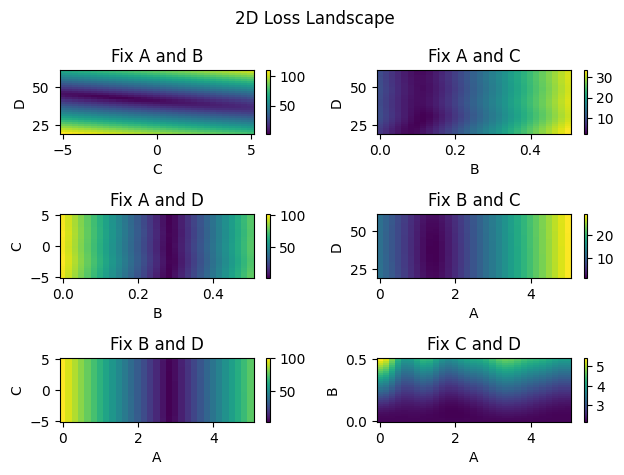

Number of minima and average value:
AB: 68  Minimum: 1.7541558854533992
AC: 195  Minimum: 2.156075563725492
AD: 97  Minimum: 2.510106041519397
BC: 209  Minimum: 1.684055925011477
BD: 93  Minimum: 1.964311651010509
CD: 148  Minimum: [2.16936261 2.17050672 2.17173451]


In [73]:
# plot 2d loss landscapes
fig, axs = plt.subplots(3, 2)

ax1 = axs[0,0]
ab = ax1.pcolor(cr, dr, saveab, vmin=np.min(saveab), vmax=np.max(saveab))
ax1.set_title("Fix A and B")
ax1.set_xlabel("C")
ax1.set_ylabel("D")
fig.colorbar(ab, ax=ax1)

ax2 = axs[0,1]
ac = ax2.pcolor(br, dr, saveac, vmin=np.min(saveac), vmax=np.max(saveac))
ax2.set_title("Fix A and C")
ax2.set_xlabel("B")
ax2.set_ylabel("D")
fig.colorbar(ac, ax=ax2)

ax3 = axs[1,0]
ad = ax3.pcolor(br, cr, savead, vmin=np.min(savead), vmax=np.max(savead))
ax3.set_title("Fix A and D")
ax3.set_xlabel("B")
ax3.set_ylabel("C")
fig.colorbar(ad, ax=ax3)

ax4 = axs[1,1]
bc = ax4.pcolor(ar, dr, savebc, vmin=np.min(savebc), vmax=np.max(savebc))
ax4.set_title("Fix B and C")
ax4.set_xlabel("A")
ax4.set_ylabel("D")
fig.colorbar(bc, ax=ax4)

ax5 = axs[2,0]
bd = ax5.pcolor(ar, cr, savebd, vmin=np.min(savebd), vmax=np.max(savebd))
ax5.set_title("Fix B and D")
ax5.set_xlabel("A")
ax5.set_ylabel("C")
fig.colorbar(bd, ax=ax5)

ax6 = axs[2,1]
cd = ax6.pcolor(ar, br, savecd, vmin=np.min(savecd), vmax=np.max(savecd))
ax6.set_title("Fix C and D")
ax6.set_xlabel("A")
ax6.set_ylabel("B")
fig.colorbar(cd, ax=ax6)

plt.suptitle("2D Loss Landscape")
plt.tight_layout()
plt.show()

print("Number of minima and average value:")
print("AB:", (saveab < 10).sum(), " Minimum:", np.sort(saveab.flatten())[0])
print("AC:", (saveac < 5).sum(), " Minimum:", np.sort(saveac.flatten())[0])
print("AD:", (savead < 10).sum(), " Minimum:", np.sort(savead.flatten())[0])
print("BC:", (savebc < 5).sum(), " Minimum:", np.sort(savebc.flatten())[0])
print("BD:", (savebd < 10).sum(), " Minimum:", np.sort(savebd.flatten())[0])
print("CD:", (savecd < 2.25).sum(), " Minimum:", np.sort(savecd.flatten())[:3])

2.iii

In [74]:
# separate training data
xtrain = x[:20]
ytrain = y[:20]

# separate test data
xtest = x[-11:]
ytest = y[-11:]

In [75]:
# define the objective functions for line (Ax + B) and parabola (Ax^2 + Bx + C)
def fitline(c, x, y):
    model = c[0] * x + c[1]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

def fitparab(c, x, y):
    model = c[0] * x ** 2 + c[1] * x + c[2]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

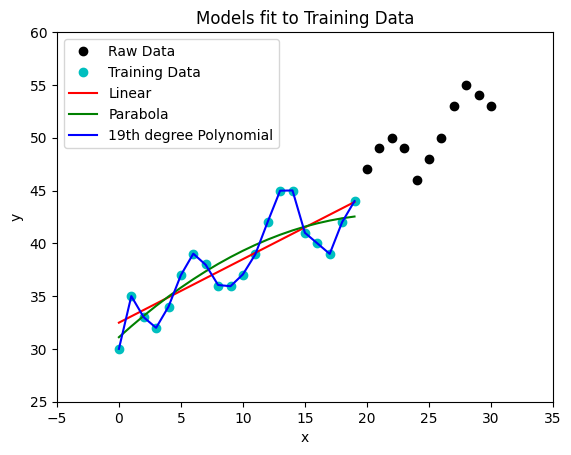

In [76]:
# set the initial guess for the params on line and parabola functions
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 20])

# perform optimization and save params
resline = opt.minimize(fitline, line0, args=(xtrain, ytrain))
resparab = opt.minimize(fitparab, parab0, args=(xtrain, ytrain))
respoly = np.polyfit(xtrain, ytrain, 19, full=True)

# get the optimized params
minsline = resline.x
minsparab = resparab.x
minspoly = respoly[0]

# generate data for plotting
yline = (minsline[0] * xtrain + minsline[1])
yparab = (minsparab[0] * xtrain ** 2 + minsparab[1] * xtrain + minsparab[2])
ypoly = np.polyval(minspoly, xtrain)

# plot the training and raw data and the fitted curves
plt.figure(4)
plt.plot(x[-11:], y[-11:], 'ko', label='Raw Data')
plt.plot(xtrain, ytrain, 'co', label='Training Data')
plt.plot(xtrain, yline, 'r-', label='Linear')
plt.plot(xtrain, yparab, 'g-', label='Parabola')
plt.plot(xtrain, ypoly, 'b-', label='19th degree Polynomial')

plt.title("Models fit to Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()
plt.show()

In [77]:
# least-squared error for the trained models
lineertr = fitline(minsline, xtrain, ytrain)
parabertr = fitparab(minsparab, xtrain, ytrain)
polyertr = np.sqrt(np.sum((ypoly - ytrain) ** 2) / len(xtrain))

# least-squared error for the model on the test data
lineerte = fitline(minsline, xtest, ytest)
paraberte = fitparab(minsparab, xtest, ytest)

polyevaltest = np.polyval(minspoly, xtest)
polyerte = np.sqrt(np.sum((polyevaltest - ytest) ** 2) / len(xtest))

print("Line LSE:")
print("Training:", lineertr)
print("Test:", lineerte, "\n")
print("Parabola LSE:")
print("Training:", parabertr)
print("Test:", paraberte, "\n")
print("Polynomial LSE:")
print("Training:", polyertr)
print("Test:", polyerte)

Line LSE:
Training: 2.2427493868088466
Test: 3.3636415371732986 

Parabola LSE:
Training: 2.1255393482814218
Test: 8.713676162354922 

Polynomial LSE:
Training: 0.02835145876672336
Test: 28621872795.094692


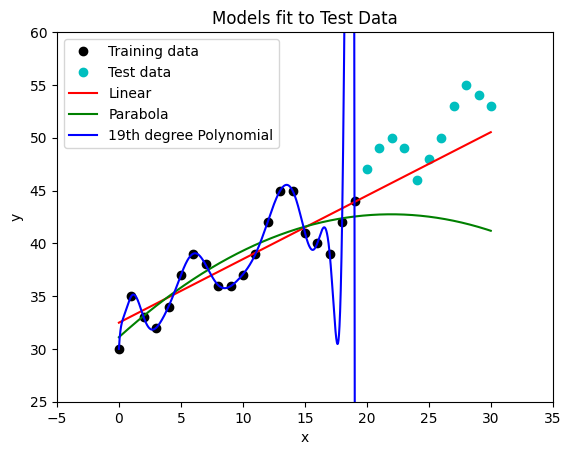

In [78]:
# generate data for plotting
xtestres = np.arange(x[0], x[30], 0.01)
ylinetest = (minsline[0] * xtestres + minsline[1])
yparabtest = (minsparab[0] * xtestres ** 2 + minsparab[1] * xtestres + minsparab[2])
ypolytest = np.polyval(minspoly, xtestres)

# plot the trained model (shows polynomial)
plt.figure(5)
plt.plot(x[:20], y[:20], 'ko', label='Training data')
plt.plot(xtest, ytest, 'co', label='Test data')
plt.plot(xtestres, ylinetest, 'r-', label='Linear')
plt.plot(xtestres, yparabtest, 'g-', label='Parabola')
plt.plot(xtestres, ypolytest, 'b-', label='19th degree Polynomial')

plt.title("Models fit to Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()
plt.show()

2.iii

In [79]:
# separate out training data
xtrain2 = np.concatenate((x[:10], x[-10:]))
ytrain2 = np.concatenate((y[:10], y[-10:]))

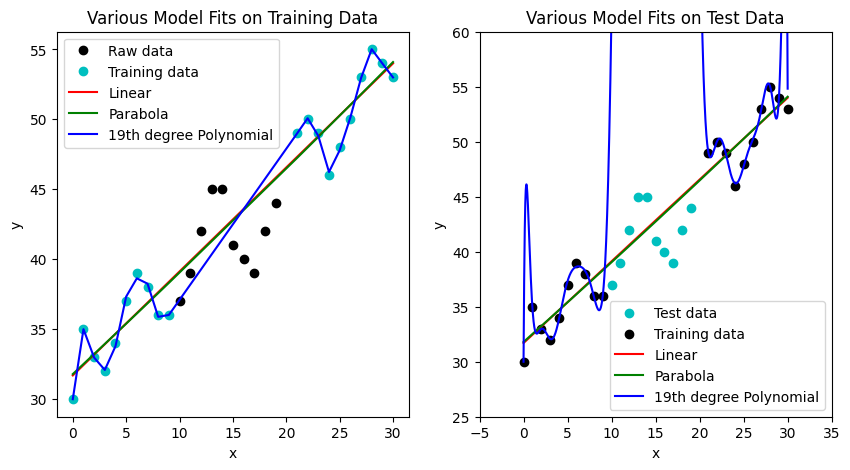

<Figure size 640x480 with 0 Axes>

In [80]:
# set the initial guess for the params
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 10])

# perform optimization and save params
resline = opt.minimize(fitline, line0, args=(xtrain2, ytrain2))
resparab = opt.minimize(fitparab, parab0, args=(xtrain2, ytrain2))
respoly = np.polyfit(xtrain2, ytrain2, 19, full=True)

# get the optimized params
minsline = resline.x
minsparab = resparab.x
minspoly = respoly[0]

# generate data for plotting training results
yline = (minsline[0] * xtrain2 + minsline[1])
yparab = (minsparab[0] * xtrain2 ** 2 + minsparab[1] * xtrain2 + minsparab[2])
ypoly = np.polyval(minspoly, xtrain2)

xtestres2 = np.arange(x[0], x[30], 0.01)
# generate data for plotting test results
ylinetest = (minsline[0] * xtestres2 + minsline[1])
yparabtest = (minsparab[0] * xtestres2 ** 2 + minsparab[1] * xtestres2 + minsparab[2])
ypolytest = np.polyval(minspoly, xtestres2)

# plot results of training
plt.figure(5, figsize=(10,5))
plt.subplot(121)
plt.title("Various Model Fits on Training Data")
plt.plot(x[10:20], y[10:20], 'ko', label='Raw data')
plt.plot(xtrain2, ytrain2, 'co', label='Training data')
plt.plot(xtrain2, yline, 'r-', label='Linear')
plt.plot(xtrain2, yparab, 'g-', label='Parabola')
plt.plot(xtrain2, ypoly, 'b-', label='19th degree Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# plot the trained model on all data
plt.subplot(122)
plt.title("Various Model Fits on Test Data")
plt.plot(x[10:20], y[10:20], 'co', label='Test data')
plt.plot(xtrain2, ytrain2, 'ko', label='Training data')
plt.plot(xtestres2, ylinetest, 'r-', label='Linear')
plt.plot(xtestres2, yparabtest, 'g-', label='Parabola')
plt.plot(xtestres2, ypolytest, 'b-', label='19th degree Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()

plt.show()
plt.tight_layout()

In [81]:
xtest2 = x[10:20]
ytest2 = y[10:20]

# least-squared error for the trained models
lineertr = fitline(minsline, xtrain2, ytrain2)
parabertr = fitparab(minsparab, xtrain2, ytrain2)
polyertr = np.sqrt(np.sum((ypoly - ytrain2) ** 2) / len(xtrain2))

# least-squared error for the model on the test data
lineerte = fitline(minsline, xtest2, ytest2)
paraberte = fitparab(minsparab, xtest2, ytest2)

polyevaltest = np.polyval(minspoly, xtest2)
polyerte = np.sqrt(np.sum((polyevaltest - ytest2) ** 2) / len(xtest2))

print("Line LSE:")
print("Training:", lineertr)
print("Test:", lineerte, "\n")
print("Parabola LSE:")
print("Training:", parabertr)
print("Test:", paraberte, "\n")
print("Polynomial LSE:")
print("Training:", polyertr)
print("Test:", polyerte)

Line LSE:
Training: 1.8516699043294016
Test: 2.940307974977315 

Parabola LSE:
Training: 1.85083641178975
Test: 2.905825819297066 

Polynomial LSE:
Training: 0.16382490406567501
Test: 507.5418394864483
